In [ ]:
# https://archive.ph/2YdOX#selection-285.49-285.75
# https://www.kaggle.com/datasets/datamunge/sign-language-mnist/code

# Health Diagnostics Data: `PCA` Vs. `t-SNE` Vs. `UMAP` Vs. `LDA`
### Import libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# import umap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### Data Simulation
In this section, we simulate a high-dimensional dataset for health diagnostics. The dataset will represent various health conditions and will be used to apply and compare different dimensionality reduction techniques.

- Let's generate a dataset with 1500 samples and 50 features.
- The data will be grouped into 6 distinct health categories.

In [2]:
# Parameters for the new dataset
n_samples = 1500  # Total number of samples
n_features = 50   # Total number of features
centers = 6       # Total number of centers (categories for Health Diagnostics)

# Simulating the dataset for Health Diagnostics
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, random_state=42)

# Assigning health-related labels to each category
health_labels = {
    0: 'Healthy', 
    1: 'Pre-Diabetes', 
    2: 'Diabetes', 
    3: 'Pre-Heart Disease', 
    4: 'Heart Disease', 
    5: 'Chronic Conditions'
}
y_labels = np.array([health_labels[label] for label in y])

# Creating a DataFrame for better visualization
health_df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(n_features)])
health_df['Health_Condition'] = y_labels

# Displaying the first few rows of the DataFrame
health_df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50,Health_Condition
0,-9.452628,1.427729,-3.473616,-0.649383,9.234039,-5.584268,-3.534601,6.511938,-5.240669,-8.431267,...,-5.529118,0.238020,-4.958786,-3.175053,-8.216458,2.810604,0.097822,-8.032977,-4.703018,Diabetes
1,-3.712398,7.972242,4.152676,1.621248,-7.649623,-8.176226,-9.294449,7.504950,2.617330,3.604029,...,-1.501652,-9.364634,9.890514,-3.577509,3.188442,-2.814329,0.034853,-0.769666,-7.227377,Healthy
2,8.338679,-4.471972,-7.173495,-0.898847,10.165028,-6.287758,3.361821,3.854616,-5.802062,4.050986,...,7.761353,7.423457,1.736246,-6.647060,-2.280969,2.881140,7.062352,8.034172,5.276004,Pre-Heart Disease
3,-3.612382,9.834840,4.824188,1.553142,-8.784302,-5.435697,-10.066008,6.732245,2.380645,2.964894,...,-1.007107,-8.041164,7.206346,-6.442201,3.631224,-4.583187,0.722652,-1.469463,-4.910455,Healthy
4,-1.572817,8.821680,3.867045,1.859173,-7.219611,-4.927165,-10.063862,7.458324,2.003962,4.044041,...,0.370629,-8.009301,7.521376,-6.255515,3.180416,-4.113279,-0.440935,0.854356,-6.914516,Healthy


### Standardizing the Data
Dimensionality reduction techniques often perform better on standardized data. Here, we scale the features to have a mean of 0 and a standard deviation of 1


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(health_df.drop('Health_Condition', axis=1))

### Applying PCA (Principal Component Analysis)
We start with PCA to reduce the dimensions of our dataset while trying to retain as much variance as possibl


In [4]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
# [Add code for 2D and 3D visualization]

#### PCA - 2D Visualization using Matplotlib

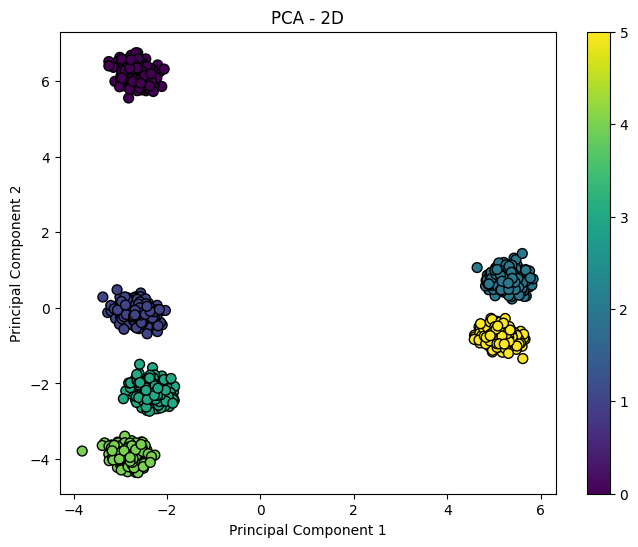

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("PCA - 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

#### PCA - 3D Visualization using Plotly

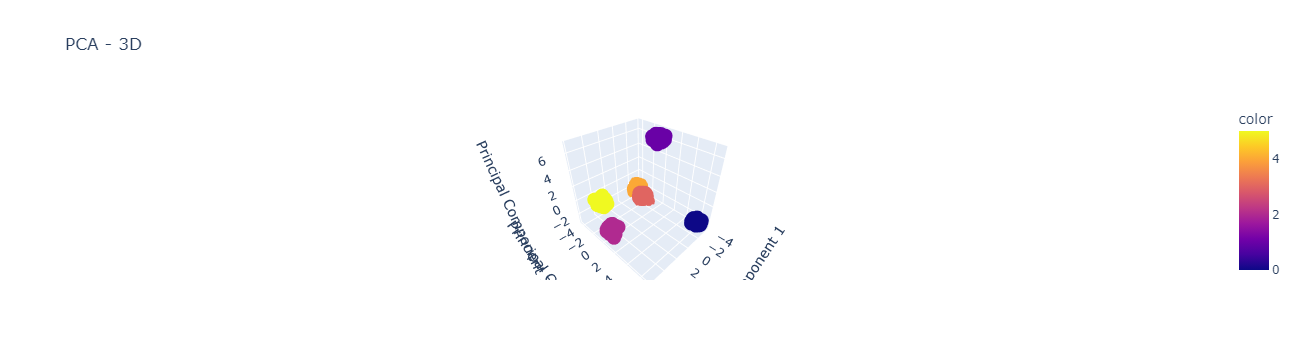

In [10]:
fig = px.scatter_3d(
    x=X_pca[:, 0], 
    y=X_pca[:, 1], 
    z=X_pca[:, 2], 
    color=y, 
    title="PCA - 3D",
    labels={'x': 'Principal Component 1', 'y': 'Principal Component 2', 'z': 'Principal Component 3'}
)
fig.show()

## Applying t-SNE
t-SNE is a powerful tool for creating compelling two-dimensional maps from high-dimensional data


In [5]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
# [Add code for 2D visualization]

## Applying UMAP
UMAP is a relatively new technique that is particularly effective for large datasets


In [6]:
reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = reducer.fit_transform(X_scaled)
# [Add code for 2D and 3D visualization]

NameError: name 'umap' is not defined

## Applying LDA (Linear Discriminant Analysis)
LDA is a supervised dimensionality reduction technique, useful for class separability


In [7]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, health_df['Health_Condition'])
# [Add code for 2D visualization]

## Visualizations
In this section, we visualize the results from each dimensionality reduction technique.


## Comparison and Conclusion
